*Universidad de Chile*  
*Facultad de Ciencias Físicas y Matemáticas*  
*Departamento de Ingeniería Matemática*

**MA5402-1 Cálculo Estocástico**  
**Profesor:** Avelio Sepúlveda.     
**Auxiliares:** Pablo Zúñiga, Vicente Maturana.    
**Alumno:** Manuel Torres.

# Tarea 1: Análisis Cualitativo del Movimiento Browniano

In [1]:
import numpy as np
import pandas as pd
import time
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
# Estilo de las figuras
sb.set_theme(style='darkgrid')
sb.set_palette('dark')

C:\Users\Personal\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Personal\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Personal\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Fijar semilla para obtener replicabilidad de los resultados
np.random.seed(500)

## Movimiento Browniano Unidimensional
### Trayectorias del Movimiento Browniano en $[0,1]$

En el intervalo $[0,1]$ definimos el conjunto $\mathcal{D}_{n}$ como el conjunto de los números diádicos de nivel $n$, dado por
\begin{equation}
    \mathcal{D}_{n} = \left\{\frac{k}{2^{n}} : k=0,1,2,\dots,2^{n}-1,2^{n}\right\},
\end{equation}
y el conjunto de los números diádicos en $[0,1]$ como
\begin{equation}
    \mathcal{D} := \bigcup_{n\in\mathbb{N}}\mathcal{D}_{n}. 
\end{equation}
Es fácil notar que $\overline{\mathcal{D}} = [0,1]$, gracias a este resultado de densidad estudiaremos numéricamente trayectorias del movimiento Browniano restringido a $[0,1]$, para ello comenzamos implementando un método para calcular $\mathcal{D}_{n}$, luego implementamos un segundo método que nos permita calcular simultáneamente varias trayectorias del movimiento Browniano sobre $\mathcal{D}_{n}$.

In [3]:
def LevelDyadics(n):
    """
    - Input: n determina el orden diadico.
    ----------------------------------------------------------------
    - Output: Entrega un arreglo con los numeros diadicos de nivel
    n en el intervalo unitario.
    ----------------------------------------------------------------
    - Comentario: 
    """
    Dyadic_Set = []
    for k in range(2**n+1):
        Dyadic_Set.append(k/2**n)
    return Dyadic_Set
def BrownianTrajectories(N, x, n):
    """
    - Input: N es la cantidad de trayectorias unidimensionales.
             x es la posicion inicial.
             n determina el orden diadico.
    ----------------------------------------------------------------
    - Output: Simula N trayectorias unidimensionales del movimiento
    Browniano partiendo en x hasta el tiempo 1, usando los diadicos 
    de nivel n.
    ----------------------------------------------------------------
    - Comentario: 
    """
    Dyadic_Set = LevelDyadics(n)
    Brownian_Motion = []
    if N == 1:
        Previous = x
        Brownian_Motion.append(Previous)
        for k in range(len(Dyadic_Set)-1):
            Brownian_Motion.append(np.random.normal(x, 1) + Previous)
            Previous = Brownian_Motion[-1]
        return Brownian_Motion
    else:  
        Previous = [x]*N
        Brownian_Motion.append(Previous)
        for k in range(len(Dyadic_Set)-1):
            Brownian_Motion.append(np.random.normal(x, 1, N) + Previous)
            Previous = Brownian_Motion[-1]
        return Brownian_Motion
def PlotBrownianTrajectories(N, x, n, style=0):
    """
    - Input: N es la cantidad de trayectorias unidimensionales.
             x es la posicion inicial.
             n determina el orden diadico.
             style determina la herramienta grafica, 0 para usar
             matplotlib, 1 para usar seaborn. Por default es 0.
    ----------------------------------------------------------------
    - Output: Entrega la imagen de N trayectorias unidimensionales 
    del movimiento Browniano partiendo en x hasta el tiempo 1, 
    usando los diadicos de nivel n.
    ----------------------------------------------------------------
    - Comentario: 
    """
    Domain = LevelDyadics(n)
    plt.figure(figsize = (10,5))
    plt.grid(True)
    plt.title(f''+str(N)+' Trajectories of Brownian Motion in Time '+str([0,1]), fontsize=25)
    plt.xlabel(f'Dyadic Set of '+str(n)+'-th level', fontsize=15)
    plt.ylabel('State of Brownian Motion', fontsize=15)
    if style == 0:
        Brownian_Trajectories = BrownianTrajectories(N, x, n)
        for j in range(N):
            Trajectory = []
            for i in range(2**n+1):
                Trajectory.append(Brownian_Trajectories[i][j])
            plt.plot(Domain, Trajectory)
    if style == 1:
        Brownian_Trajectories = pd.DataFrame(np.array(BrownianTrajectories(N, x, n)))
        sb.lineplot(data=Brownian_Trajectories, legend=False)

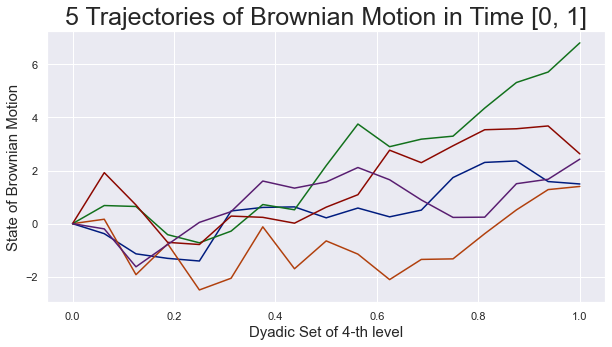

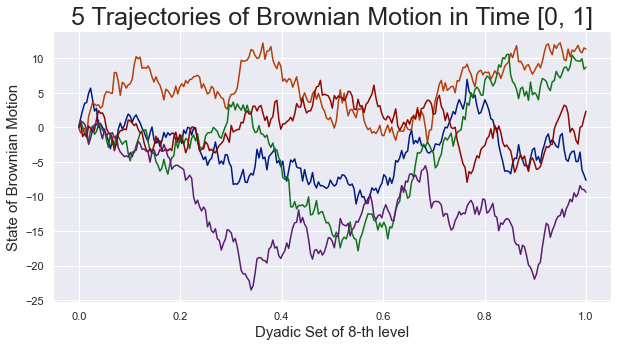

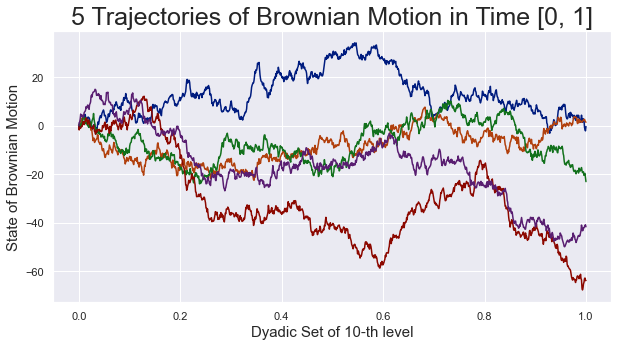

In [4]:
# Test de los metodos
N, x = 5, 0
PlotBrownianTrajectories(N, x, 4)
PlotBrownianTrajectories(N, x, 8)
PlotBrownianTrajectories(N, x, 10)

A continuación se presenta uan figura con $1024$ trayectorias del movimiento Browniano sobre $[0,1]$ aproximado con el décimo nivel diádico:

El tiempo de ejecución es de 2.1547298 segundos


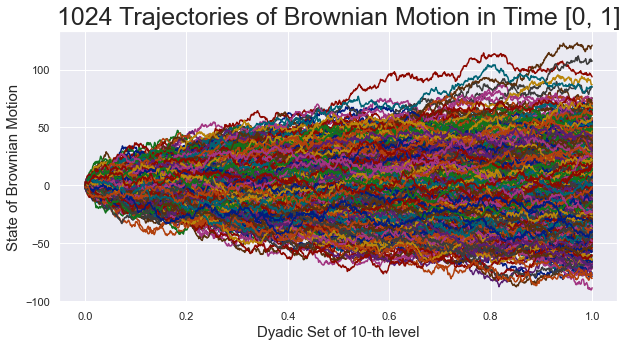

In [5]:
N, x, n = 1024, 0, 10 
start = time.perf_counter()     # Iniciamos el conteo
PlotBrownianTrajectories(N, x, n)
end = time.perf_counter() 
print('El tiempo de ejecución es de '+str(end-start)+' segundos')

A continuación se presentan figuras en las que se compara el movimiento Browniano sobre distintos niveles diádicos (ver etiquetas):

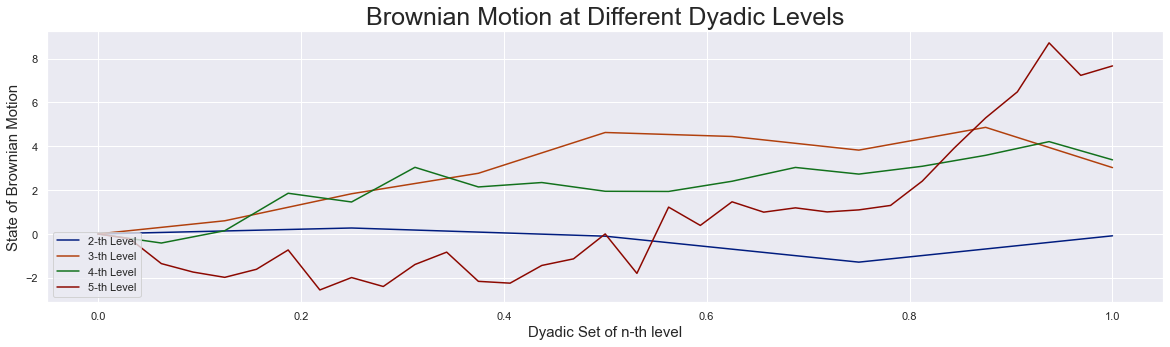

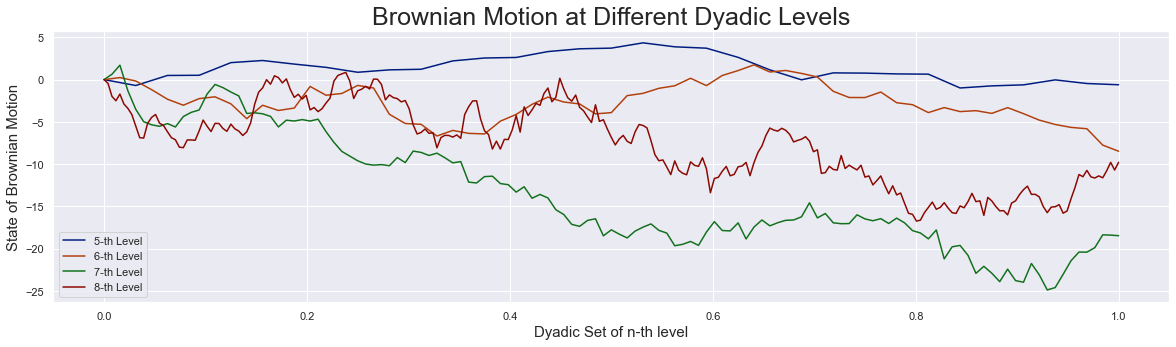

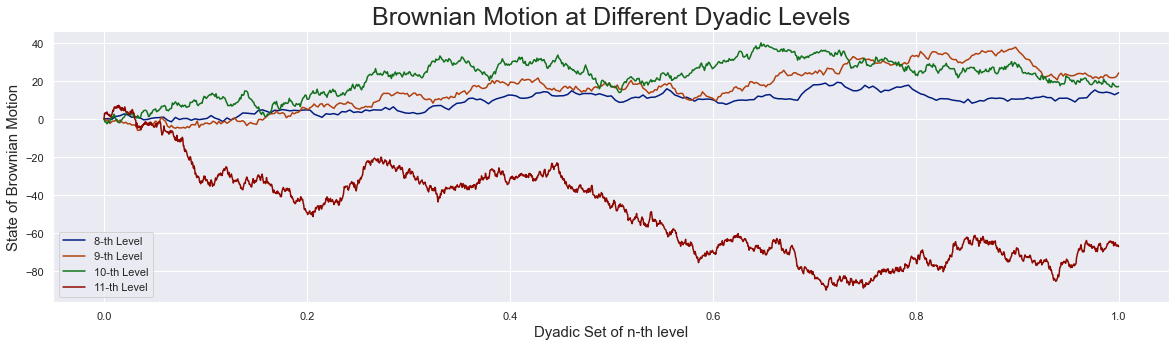

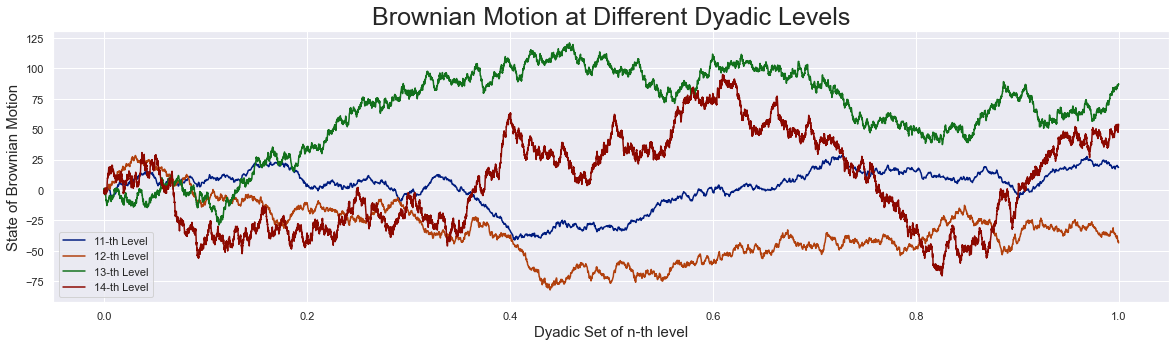

In [6]:
for i in [0,1,2,3]:
    plt.figure(figsize = (20,5))
    plt.grid(True)
    plt.title(f'Brownian Motion at Different Dyadic Levels', fontsize=25)
    plt.xlabel(f'Dyadic Set of n-th level', fontsize=15)
    plt.ylabel('State of Brownian Motion', fontsize=15)
    for n in [3*i+2,3*i+3,3*i+4,3*i+5]:
        plt.plot(LevelDyadics(n), BrownianTrajectories(1, 0, n), label = str(n)+'-th Level')
        plt.legend(loc = 'lower left')
    plt.show()

### Movimiento Browniano Unidimensional en $[0,N]$

Una primera idea para simular el movimiento Browniano en un intervalo de tiempo $[0,N]$ es definir el conjunto de los números diádicos de nivel $n$-ésimo sobre el intervalo $[0,N]$, este conjunto es dado por:
\begin{equation}
    \mathcal{D}_{n}^{[0,N]} := \left\{t + \frac{k}{2^{n}} : t=0,\dots,N-1; k=1,\dots,2^{n} \right\}.
\end{equation}
Luego definido $\mathcal{D}_{n}^{[0,N]}$ es posible calcular el movimiento Browniano sobre este dominio, para ello basta con usar la siguiente implementación:

Un problema que surge de la implementación anterior es que el tiempo de cálculo es excesivo, para solucionar esto calcularemos el movimiento Browniano en un intervalo de tiempo $[0,N]$ utilizando $N$ trayectorias calculadas en un intervalo $[0,1]$, utilizando $\mathcal{D}_{n}$ como dominio.

In [7]:
def BrownianMotion(N, x, n):
    """
    - Input: N es el tiempo final.
             x es la posicion inicial.
             n determina el orden diadico.
    ----------------------------------------------------------------
    - Output: Simula una trayectoria unidimensional del movimiento
    Browniano partiendo en x, hasta el tiempo final N, usando los 
    diadicos de nivel n.
    ----------------------------------------------------------------
    - Comentario: 
    """
    Trajectories = BrownianTrajectories(N, x, n)
    Brownian_Motion = []
    for i in range(len(Trajectories[0])):
        for j in range(len(Trajectories)):
            Value = Trajectories[j]
            Brownian_Motion.append(Value[i])
    return Brownian_Motion
def PlotBrownianMotion(N, x, n):
    """
    - Input: N es el tiempo final.
             x es la posicion inicial.
             n determina el orden diadico.
    ----------------------------------------------------------------
    - Output: Grafica una trayectoria unidimensional del movimiento
    Browniano versus el tiempo. Estado inicial en x, tiempo final N, 
    usando los diadicos de nivel n. 
    ----------------------------------------------------------------
    - Comentario: 
    """
    # Arreglos para graficar
    Brownian_Motion = BrownianMotion(N, x, n)
    # Domain = np.linspace(0, N, N*2**n)
    Domain = np.linspace(0, N, len(Brownian_Motion))
    # Figura
    plt.figure(figsize = (10,5))
    plt.grid(True)
    plt.title(f'Trajectory of One Dimentional Brownian Motion in Time '+str([0,N]), fontsize=20)
    plt.xlabel(f'Domain Generated by the '+str(n)+'th-Level Dyadics', fontsize=15)
    plt.ylabel('State of Brownian Motion', fontsize=15)
    #plt.plot(Domain, Brownian_Motion)
    sb.lineplot(x = Domain, y = Brownian_Motion, legend=False)

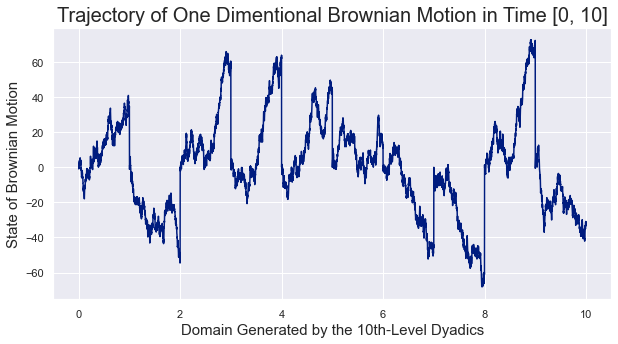

In [8]:
# Test de los metodos
N, x, n = 10, 0, 10
PlotBrownianMotion(N, x, n)

La siguiente figura del movimiento Browniano en el intervalo $[0,1024]$ con el décimo nivel diádico para la aproximación muestra una trayectoria "gruesa", sin embargo esto se explica debido a que hay del orden de $2^{10}$ puntos evaluados, al realizar zoom se esperaría observar una trayectoria local como la imagen anterior.

El tiempo de ejecución es de 65.45676900000001 segundos


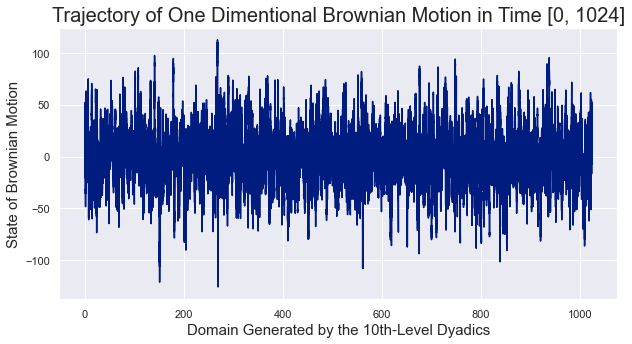

In [9]:
N, x, n = 1024, 0, 10
start = time.perf_counter()     # Iniciamos el conteo
PlotBrownianMotion(N, x, n)
end = time.perf_counter() 
print('El tiempo de ejecución es de '+str(end-start)+' segundos')

## Movimiento Browniano Multidimensional

In [10]:
def PlotTwoDimensionalBrownianMotion(N, x, n, r = 1):
    """
    - Input: N es el tiempo final.
             x es la posicion inicial.
             n determina el orden diadico.
             r es la cantidad de repeticiones del MB. Por default
              toma valor 1.
    ----------------------------------------------------------------
    - Output: Grafica trayectoria bidimensional del movimiento
    Browniano partiendo en (x,x), hasta el tiempo final N, usando 
    los diadicos de nivel n.
    ----------------------------------------------------------------
    - Comentario: 
    """
    plt.figure(figsize = (10,10))
    plt.grid(True)
    plt.title(f'Trajectory of Two Dimentional Brownian Motion in Time '+str([0,N])+' with '+str(n)+'-th Dyadic Level', fontsize=15)
    plt.xlabel('Horizontal Position', fontsize=15)
    plt.ylabel('Vertical Position', fontsize=15)
    if r != 1:
        for i in range(r):
            plt.plot(BrownianMotion(N, x, n), BrownianMotion(N, x, n), label=str(i+1)+'th Repetition')
            plt.legend()
    else:
        plt.plot(BrownianMotion(N, x, n), BrownianMotion(N, x, n))

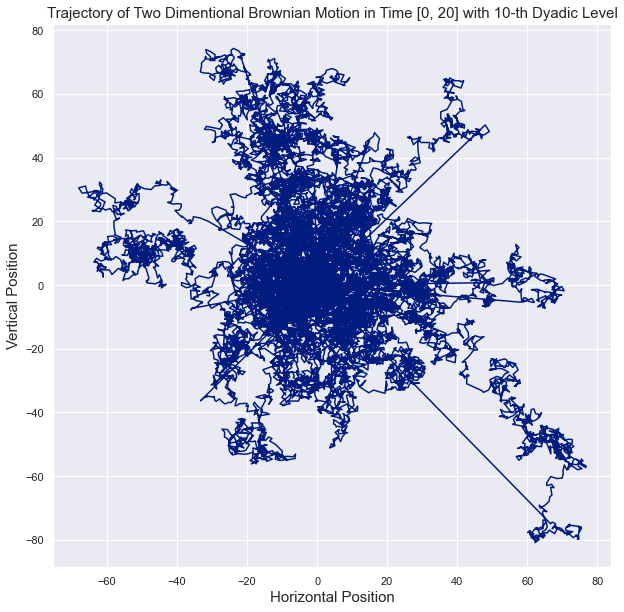

In [11]:
# Test del metodo
N, x, n = 20, 0, 10
PlotTwoDimensionalBrownianMotion(N, x, n)

In [12]:
def PlotThreeDimensionalBrownianMotion(N, x, n, r = 1):
    """
    - Input: N es el tiempo final.
             x es la posicion inicial.
             n determina el orden diadico.
             r es la cantidad de repeticiones del MB. Por default
              toma valor 1.
    ----------------------------------------------------------------
    - Output: Grafica trayectoria tridimensional del movimiento
    Browniano partiendo en (x,x,x), hasta el tiempo final N, usando 
    los diadicos de nivel n.
    ----------------------------------------------------------------
    - Comentario: 
    """
    plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    plt.title(f'Trajectory of Three Dimentional Brownian Motion in Time '+str([0,N])+' with '+str(n)+'-th Dyadic Level', fontsize=15)
    if r != 1:
        for i in range(r):
            ax.plot3D(BrownianMotion(N, x, n), BrownianMotion(N, x, n), BrownianMotion(N,x,n), label=str(i+1)+'th Repetition')
            plt.legend()
    else:
        ax.plot3D(BrownianMotion(N, x, n), BrownianMotion(N, x, n), BrownianMotion(N,x,n))

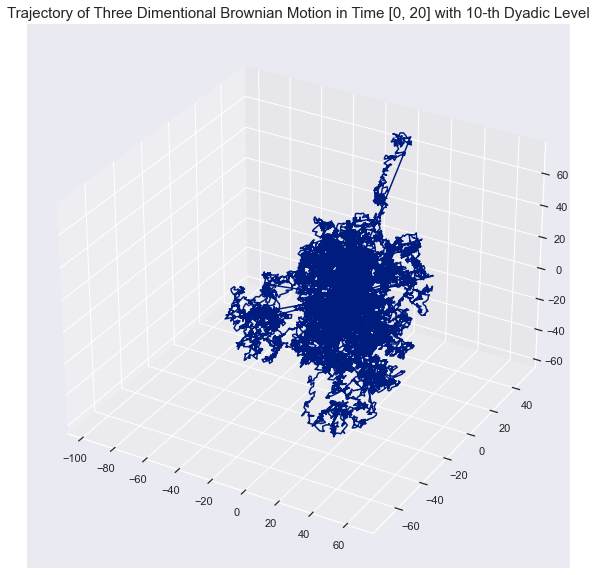

In [13]:
# Test del metodo
N, x, n = 20, 0, 10
PlotThreeDimensionalBrownianMotion(N, x, n)

### Visualización del Movimiento Browniano en el Espacio

#### Dos Dimensiones

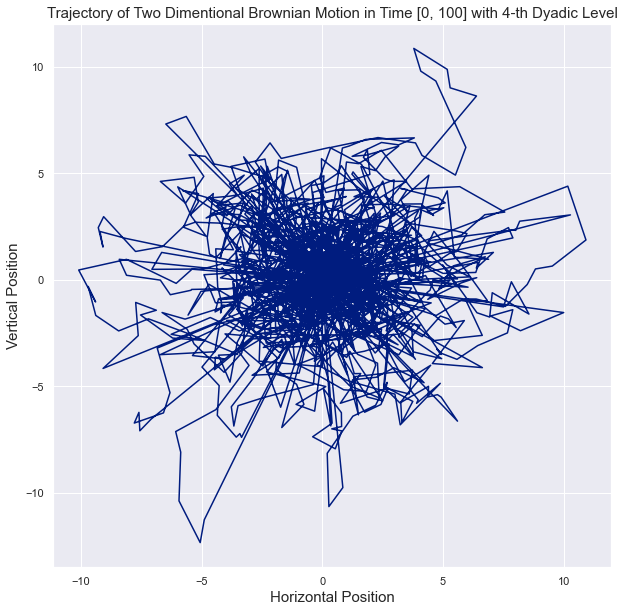

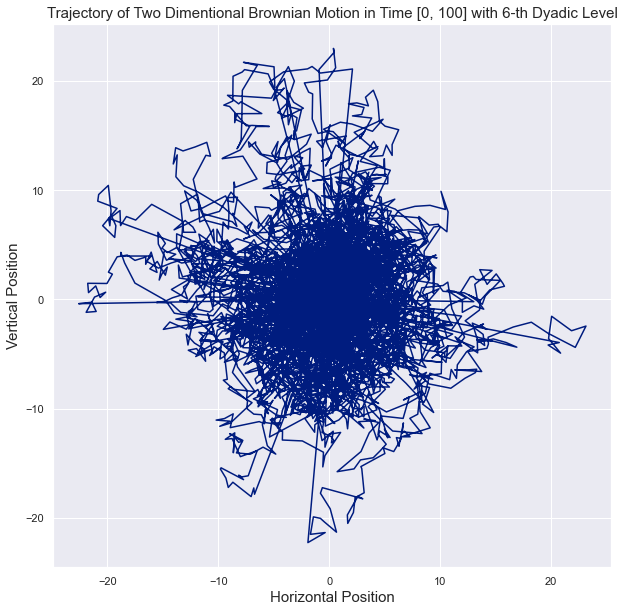

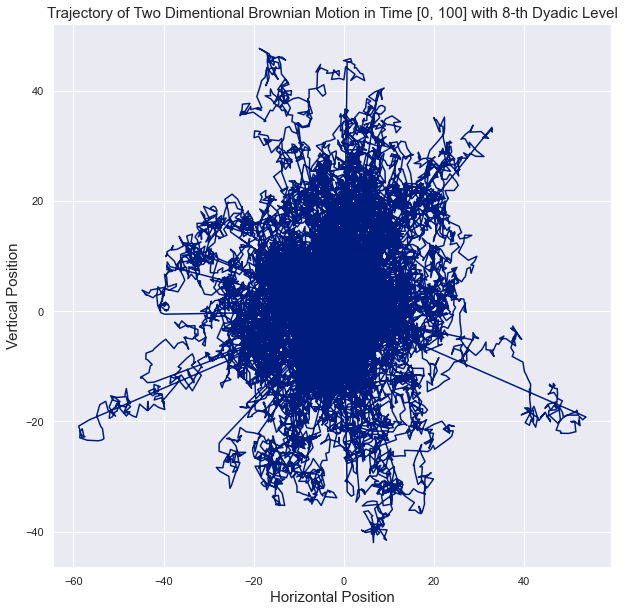

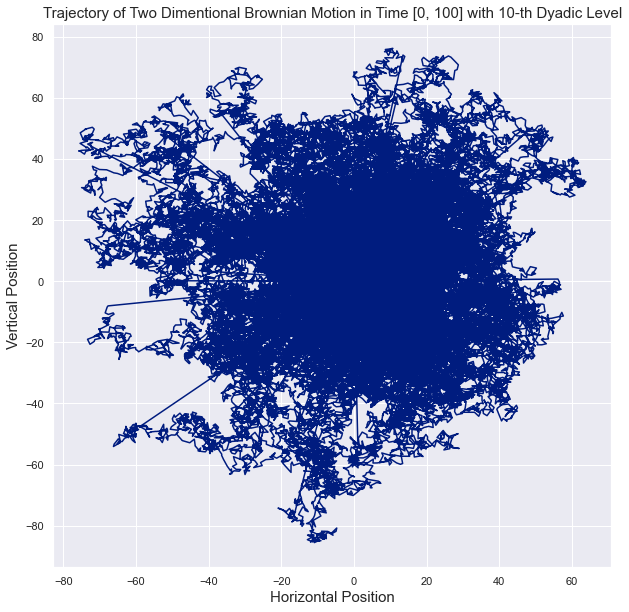

In [14]:
N, x = 100, 0
PlotTwoDimensionalBrownianMotion(N, x, 4)
PlotTwoDimensionalBrownianMotion(N, x, 6)
PlotTwoDimensionalBrownianMotion(N, x, 8)
PlotTwoDimensionalBrownianMotion(N, x, 10)

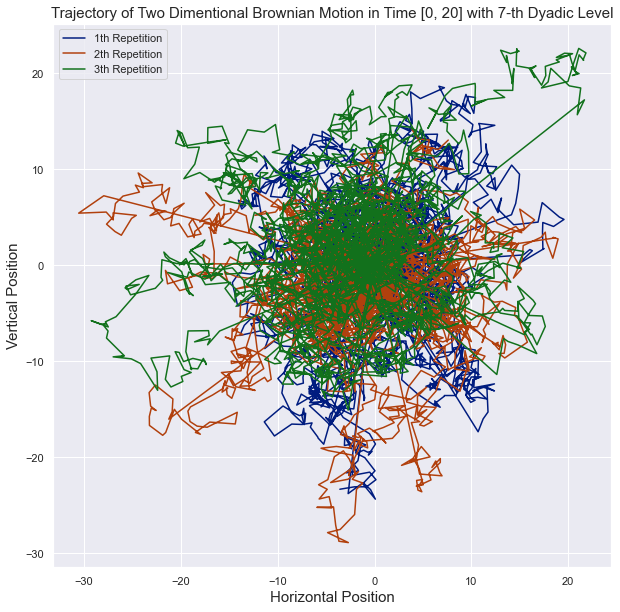

In [15]:
N, x, n = 20, 0, 7
PlotTwoDimensionalBrownianMotion(N, x, n, 3)

#### Tres Dimensiones

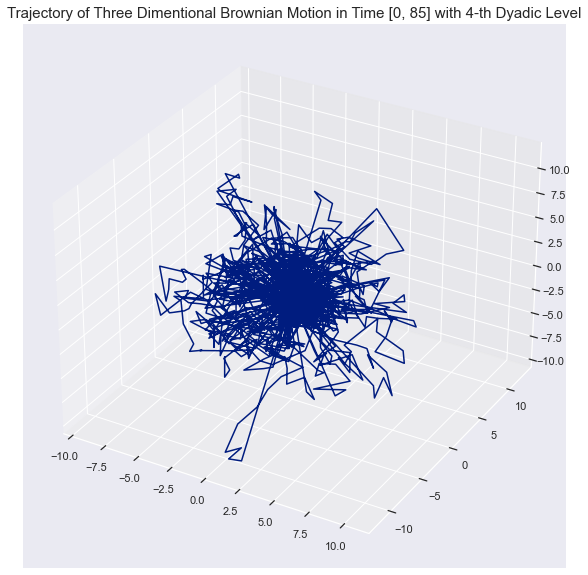

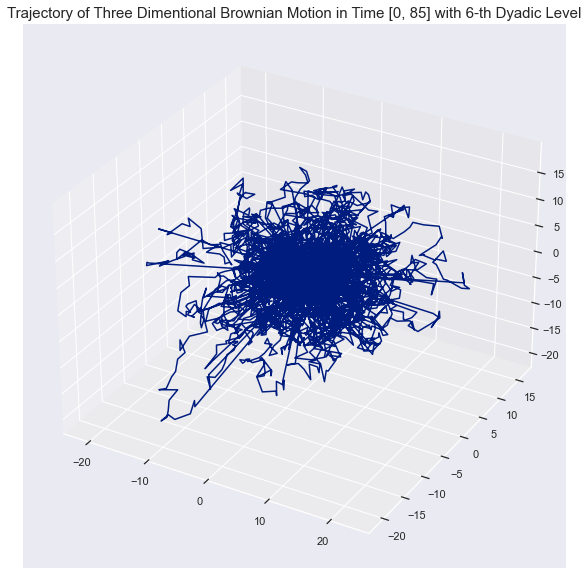

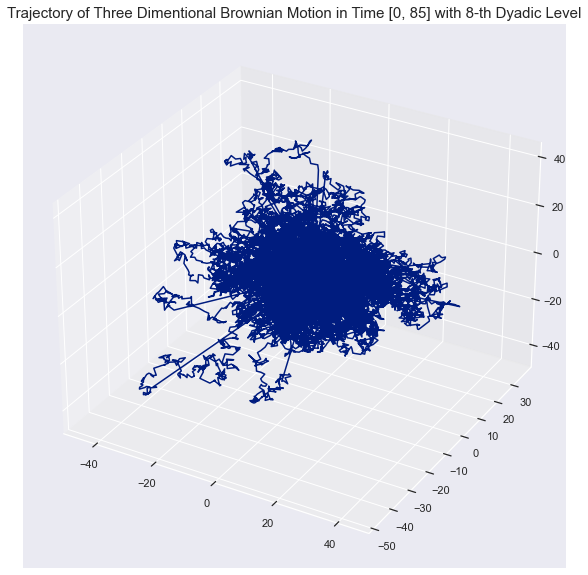

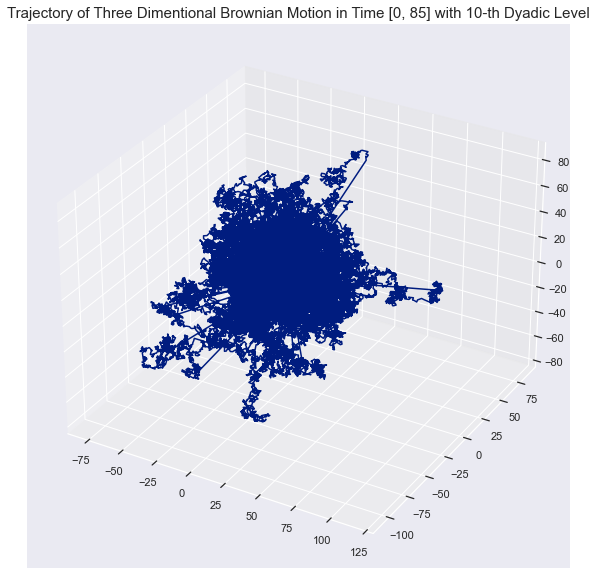

In [16]:
N, x = 85, 0
PlotThreeDimensionalBrownianMotion(N, x, 4)
PlotThreeDimensionalBrownianMotion(N, x, 6)
PlotThreeDimensionalBrownianMotion(N, x, 8)
PlotThreeDimensionalBrownianMotion(N, x, 10)

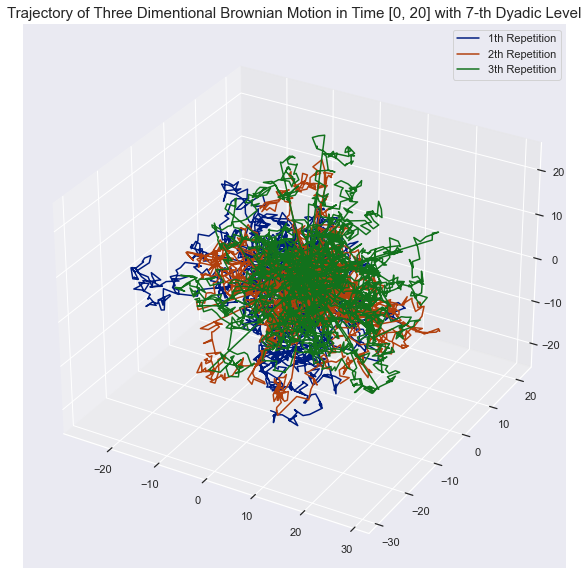

In [17]:
N, x, n = 20, 0, 7
PlotThreeDimensionalBrownianMotion(N, x, n, 3)

## Análisis Cualitativo del Movimiento Browniano (Pregunta 3)

A partir de lo observado en las simulaciones anteriores, se responden las siguientes preguntas de forma cualitativa:
1. ¿Es el movimiento Browniano transiente o recurrente para $d=1,2,3$? 
2. Tomando un movimiento Browniano $(B_{t})_{t\in[0,1]}$. Se definen las funciones:
    * $\phi_{1}(t) = \sqrt{t}$.
    * $\phi_{2}(t) = \sqrt{t\log(1/t)}$.
    * $\phi_{3}(t) = \sqrt{t\log(\log(1/t))}$.     
   ¿Para cual de ellas $\displaystyle\limsup_{t\to0}B_{t}/\phi_{i}(t) < \infty$?
3. Para las simulaciones unidimensionales, cuente la cantidad de veces que la aproximación Browniana a nivel $n$ intersecta el origen. ¿Qué puede decir a medida que $n\to\infty$?
4. Para una función $f$ Hölder (o derivable) su variación
   \begin{equation}
       V_{1}(f) := \lim_{n\to\infty} \sum_{t\in\mathcal{D}\setminus\{0\}} |f(t) - f(t-2^{n})| < \infty.
   \end{equation}
   ¿Es cierto para el movimiento Browniano 1-dimensional restringido a $[0,1]$? ¿Qué pasa con su variación cuadrática?
5. Una función $C^{1}([0,1])$ con $f(0) = 0$ satisface que
   \begin{equation}
       f^{2}(t) = \int_{0}^{t} 2f(s)f'(s)ds = \lim_{n\to\infty} \sum_{s\in\mathcal{D}_{n}\cap[0,t)} 2f(t)\cdot \frac{f(t+2^{-n})-f(t)}{2^{-2n}} 2^{-2}?
   \end{equation}

### 1) Recurrencia o Transiencia del Movimiento Browniano
Para los casos de $d=1,2,3$ no se observa en las figuras de la secciones *Movmimiento Browniano Unidimensional en $[0,N]$* ó *Visualización del Movimiento Browniano en el Espacio* que haya recurrencia en alguna clase de estados.

### 2) Análisis Asintótico
Aplicaremos versiones modificadas de los métodos de la sección *Trayectorias del Movimiento Browniano en $[0,1]$* para estudiar las funciones
\begin{equation}
    \frac{B_{t}}{\phi_{i}(t)} ,\quad i=1,2,3;
\end{equation}
antes definidas. Para el caso de $\phi_{1}(t)=\sqrt{t}$ se puede observar que no se asegura que el $\displaystyle\limsup_{t\to\infty}$ converge, pues no hay explosiones, una solución para confirmar esto puede ser simular sobre $\mathcal{D}_{n}^{[0,T]}$ y ver un intervalo de tiempo mayor.


In [18]:
def BrownianTrajectoriesPhi1(N, x, n):
    """
    - Input: N es la cantidad de trayectorias unidimensionales.
             x es la posicion inicial.
             n determina el orden diadico.
    ----------------------------------------------------------------
    - Output: Simula N trayectorias unidimensionales del movimiento
    Browniano partiendo en x hasta el tiempo 1, usando los diadicos 
    de nivel n.
    ----------------------------------------------------------------
    - Comentario: 
    """
    Dyadic_Set = LevelDyadics(n)
    Brownian_Motion = []
    if N == 1:
        Previous = x
        Brownian_Motion.append(Previous)
        for k in range(len(Dyadic_Set)):
            Brownian_Motion.append((np.random.normal(x, 1) + Previous)/np.sqrt(k/2**n))
            Previous = Brownian_Motion[-1]
        return Brownian_Motion
    else:  
        Previous = [x]*N
        for k in range(len(Dyadic_Set)):
            if k==0:
                Brownian_Motion.append(np.random.normal(x, 1, N) + Previous)
            else: 
                Brownian_Motion.append((np.random.normal(x, 1, N) + Previous)/np.sqrt(k/2**n))
                Previous = Brownian_Motion[-1]
        return Brownian_Motion
def PlotBrownianTrajectoriesPhi1(N, x, n, style=0):
    """
    - Input: N es la cantidad de trayectorias unidimensionales.
             x es la posicion inicial.
             n determina el orden diadico.
             style determina la herramienta grafica, 0 para usar
             matplotlib, 1 para usar seaborn. Por default es 0.
    ----------------------------------------------------------------
    - Output: Entrega la imagen de N trayectorias unidimensionales 
    del movimiento Browniano partiendo en x hasta el tiempo 1, 
    usando los diadicos de nivel n.
    ----------------------------------------------------------------
    - Comentario: 
    """
    Domain = LevelDyadics(n)
    plt.figure(figsize = (10,5))
    plt.grid(True)
    plt.title(f''+str(N)+' Trajectories of $B_{t}/\phi_{1}(t)$ in Time '+str([0,1]), fontsize=25)
    plt.xlabel(f'Dyadic Set of '+str(n)+'-th level', fontsize=15)
    plt.ylabel('State of Brownian Motion', fontsize=15)
    if style == 0:
        Brownian_Trajectories = BrownianTrajectoriesPhi1(N, x, n)
        for j in range(N):
            Trajectory = []
            for i in range(2**n+1):
                Trajectory.append(Brownian_Trajectories[i][j])
            plt.plot(Domain, Trajectory)
    if style == 1:
        Brownian_Trajectories = pd.DataFrame(np.array(BrownianTrajectoriesPhi1(N, x, n)))
        sb.lineplot(data=Brownian_Trajectories, legend=False)

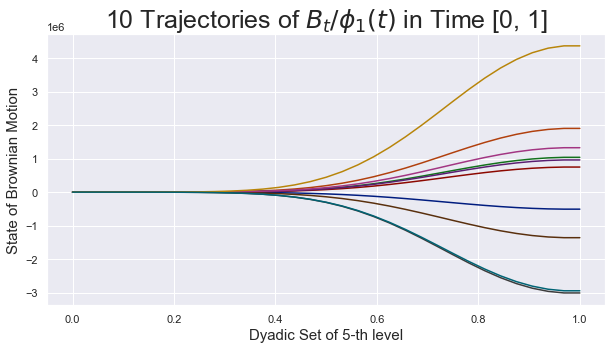

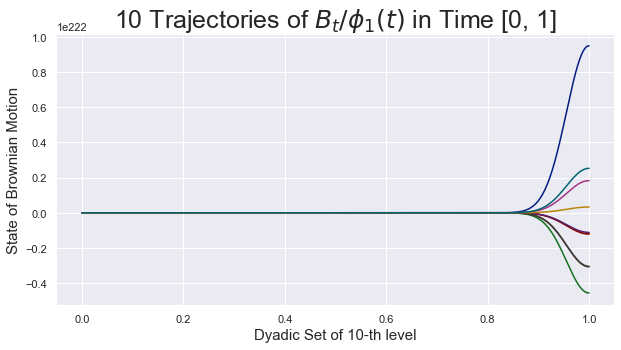

In [19]:
PlotBrownianTrajectoriesPhi1(10, 0, 5)
PlotBrownianTrajectoriesPhi1(10, 0, 10)

Para el caso de $\phi_{2}(t) = \sqrt{t\log(1/t)}$:

In [20]:
def BrownianTrajectoriesPhi2(N, x, n):
    """
    - Input: N es la cantidad de trayectorias unidimensionales.
             x es la posicion inicial.
             n determina el orden diadico.
    ----------------------------------------------------------------
    - Output: Simula N trayectorias unidimensionales del movimiento
    Browniano partiendo en x hasta el tiempo 1, usando los diadicos 
    de nivel n.
    ----------------------------------------------------------------
    - Comentario: 
    """
    Dyadic_Set = LevelDyadics(n)
    Brownian_Motion = []
    if N == 1:
        Previous = x
        Brownian_Motion.append(Previous)
        for k in range(len(Dyadic_Set)):
            Brownian_Motion.append((np.random.normal(x, 1) + Previous)/np.sqrt((k/2**n) *np.log(k/2**(-n))))
            Previous = Brownian_Motion[-1]
        return Brownian_Motion
    else:  
        Previous = [x]*N
        for k in range(len(Dyadic_Set)):
            if k==0:
                Brownian_Motion.append(np.random.normal(x, 1, N) + Previous)
            else: 
                Brownian_Motion.append((np.random.normal(x, 1, N) + Previous)/np.sqrt( (k/2**n)*np.log(k/(2**(-n)))))
                Previous = Brownian_Motion[-1]
        return Brownian_Motion
def PlotBrownianTrajectoriesPhi2(N, x, n, style=0):
    """
    - Input: N es la cantidad de trayectorias unidimensionales.
             x es la posicion inicial.
             n determina el orden diadico.
             style determina la herramienta grafica, 0 para usar
             matplotlib, 1 para usar seaborn. Por default es 0.
    ----------------------------------------------------------------
    - Output: Entrega la imagen de N trayectorias unidimensionales 
    del movimiento Browniano partiendo en x hasta el tiempo 1, 
    usando los diadicos de nivel n.
    ----------------------------------------------------------------
    - Comentario: 
    """
    Domain = LevelDyadics(n)
    plt.figure(figsize = (10,5))
    plt.grid(True)
    plt.title(f''+str(N)+' Trajectories of $B_{t}/\phi_{2}(t)$ in Time '+str([0,1]), fontsize=25)
    plt.xlabel(f'Dyadic Set of '+str(n)+'-th level', fontsize=15)
    plt.ylabel('State of Brownian Motion', fontsize=15)
    if style == 0:
        Brownian_Trajectories = BrownianTrajectoriesPhi2(N, x, n)
        for j in range(N):
            Trajectory = []
            for i in range(2**n+1):
                Trajectory.append(Brownian_Trajectories[i][j])
            plt.plot(Domain, Trajectory)
    if style == 1:
        Brownian_Trajectories = pd.DataFrame(np.array(BrownianTrajectoriesPhi2(N, x, n)))
        sb.lineplot(data=Brownian_Trajectories, legend=False)

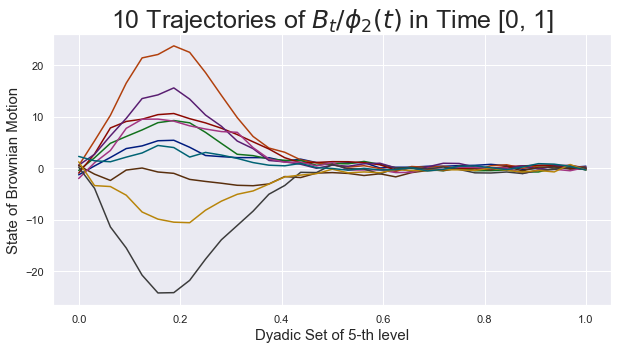

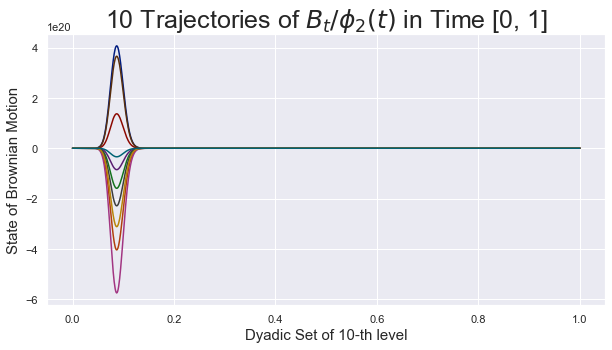

In [21]:
PlotBrownianTrajectoriesPhi2(10, 0, 5)
PlotBrownianTrajectoriesPhi2(10, 0, 10)

Para el caso $\phi_{3}(t) = \sqrt{t\log(\log(1/t))}$:

In [22]:
def BrownianTrajectoriesPhi3(N, x, n):
    """
    - Input: N es la cantidad de trayectorias unidimensionales.
             x es la posicion inicial.
             n determina el orden diadico.
    ----------------------------------------------------------------
    - Output: Simula N trayectorias unidimensionales del movimiento
    Browniano partiendo en x hasta el tiempo 1, usando los diadicos 
    de nivel n.
    ----------------------------------------------------------------
    - Comentario: 
    """
    Dyadic_Set = LevelDyadics(n)
    Brownian_Motion = []
    if N == 1:
        Previous = x
        Brownian_Motion.append(Previous)
        for k in range(len(Dyadic_Set)):
            Brownian_Motion.append((np.random.normal(x, 1) + Previous)/np.sqrt((k/2**n) *np.log(np.log(k/2**(-n)))))
            Previous = Brownian_Motion[-1]
        return Brownian_Motion
    else:  
        Previous = [x]*N
        for k in range(len(Dyadic_Set)):
            if k==0:
                Brownian_Motion.append(np.random.normal(x, 1, N) + Previous)
            else: 
                Brownian_Motion.append((np.random.normal(x, 1, N) + Previous)/np.sqrt((k/2**n) *np.log(np.log(k/2**(-n)))))
                Previous = Brownian_Motion[-1]
        return Brownian_Motion
def PlotBrownianTrajectoriesPhi3(N, x, n, style=0):
    """
    - Input: N es la cantidad de trayectorias unidimensionales.
             x es la posicion inicial.
             n determina el orden diadico.
             style determina la herramienta grafica, 0 para usar
             matplotlib, 1 para usar seaborn. Por default es 0.
    ----------------------------------------------------------------
    - Output: Entrega la imagen de N trayectorias unidimensionales 
    del movimiento Browniano partiendo en x hasta el tiempo 1, 
    usando los diadicos de nivel n.
    ----------------------------------------------------------------
    - Comentario: 
    """
    Domain = LevelDyadics(n)
    plt.figure(figsize = (10,5))
    plt.grid(True)
    plt.title(f''+str(N)+' Trajectories of $B_{t}/\phi_{3}(t)$ in Time '+str([0,1]), fontsize=25)
    plt.xlabel(f'Dyadic Set of '+str(n)+'-th level', fontsize=15)
    plt.ylabel('State of Brownian Motion', fontsize=15)
    if style == 0:
        Brownian_Trajectories = BrownianTrajectoriesPhi3(N, x, n)
        for j in range(N):
            Trajectory = []
            for i in range(2**n+1):
                Trajectory.append(Brownian_Trajectories[i][j])
            plt.plot(Domain, Trajectory)
    if style == 1:
        Brownian_Trajectories = pd.DataFrame(np.array(BrownianTrajectoriesPhi3(N, x, n)))
        sb.lineplot(data=Brownian_Trajectories, legend=False)

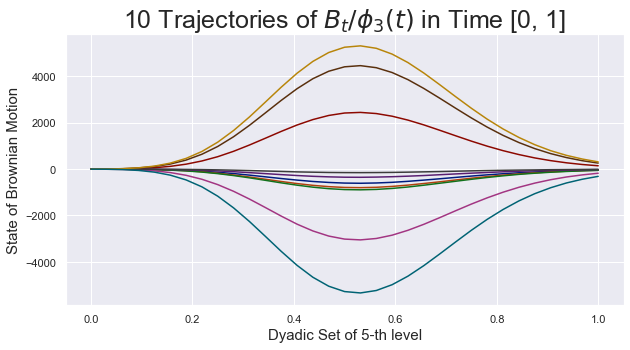

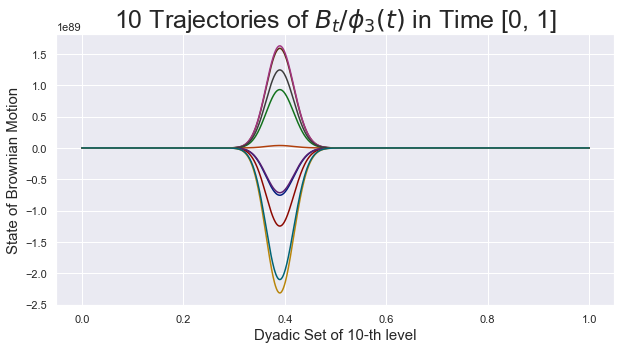

In [23]:
PlotBrownianTrajectoriesPhi3(10, 0, 5)
PlotBrownianTrajectoriesPhi3(10, 0, 10)

En las figuras anteriores pareciera que cuando $t\to0$ el limite superior es finito.

### 3) Retorno al Estado Inicial en el Caso Unidimensional
Miramos algunas simulaciones del *Movimiento Browniano Unidimensional en $[0,N]$$:

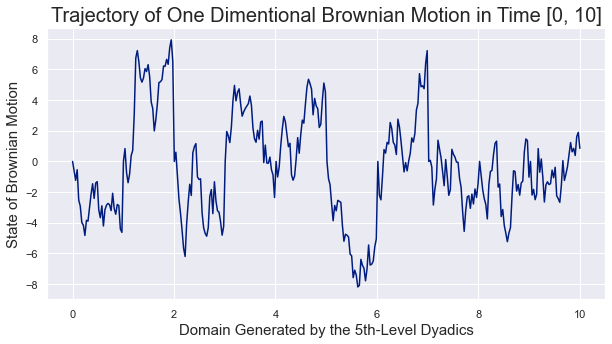

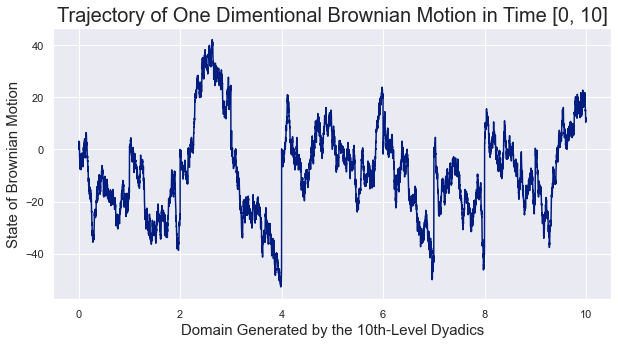

In [37]:
# Test de los metodos
PlotBrownianMotion(10, 0, 5)
PlotBrownianMotion(10, 0, 10)

Es posible notar que el proceso retorna al $0$ una cantidad no despreciable de veces, aunque a momentos existen rachas que evitan dicho retorno durante varias realizaciones de tiempo. Es esperable hipotetizar respecto a que se retornará al cero infinitas veces tomando un tiempo $N\to\infty$, es decir, se espera que sea cierto que
\begin{equation}
    \mathbb{P}\left( (\forall t>0)(\exists h>0) : B_{t+h} = 0 \right) = 1
\end{equation}

## Otros Resultados Indagatorios (Extra)

### Tiempo de Simulación en Términos del Nivel Diádico
Calculamos el tiempo que demora una suma simple:

In [25]:
start = time.perf_counter()     # Iniciamos el conteo
1+1                             # Hacemos una suma simple
end = time.perf_counter()       # Finalizamos el conteo
print(end - start)              # Print la diferencia de tiempo

0.0001220999999986816


A continuación se calcula el tiempo de cálculo de una simulación del movimiento Browniano (dos trayectorias) en $[0,1]$ en función del orden del nivel diádico.

In [28]:
def SimulationTimeBrownianMotion(n):
    start = time.perf_counter()     # Iniciamos el conteo
    BrownianMotion(2,0,n)
    end = time.perf_counter()       # Finalizamos el conteo
    return end - start

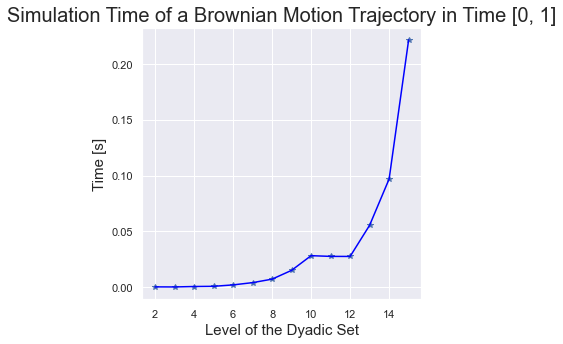

In [29]:
level = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
times = []
for n in range(len(level)):
    times.append(SimulationTimeBrownianMotion(level[n]))
plt.figure(figsize = (5,5))
plt.grid(True)
plt.title(f'Simulation Time of a Brownian Motion Trajectory in Time '+str([0,1]), fontsize = 20)
plt.xlabel(f'Level of the Dyadic Set', fontsize = 15)
plt.ylabel(f'Time [s]', fontsize = 15)
plt.plot(level, times, 'b*')
plt.plot(level, times, 'blue')

Vemos que el tiempo de cálculo aumenta exponencial en función del nivel diádico.

### Varianza en Función del Tiempo
El movimiento Browniano es definido como un proceso $B:=(B_{t})_{t\geq 0}$, tal que $B_{t}\sim\mathcal{N}(0,\sigma_{t})$ para todo $t>0$. Se ha supuesto sin pérdida de generalidad que $\sigma_{t} = t$, sin embargo, a continuación visualizaremos qué ocurre cuando $\sigma_{t}$ actúa como función del tiempo con distintas naturalezas, en particular veremos qué ocurre para $(B_{t})_{t\in[0,1]}$ cuando:
1. $\sigma_{t} = 1$ (varianza constante).
2. $\sigma_{t} = t^{2}$ (varianza cuadrática).
3. $\sigma_{t} = 2^{t}$ (varianza exponencial).

In [30]:
def BrownianTrajectories_ConstantVariation(N, x, n):
    """
    - Input: N es la cantidad de trayectorias unidimensionales.
             x es la posicion inicial.
             n determina el orden diadico.
    ----------------------------------------------------------------
    - Output: Simula N trayectorias unidimensionales del movimiento
    Browniano partiendo en x hasta el tiempo 1, usando los 
    diadicos de nivel n.
    ----------------------------------------------------------------
    - Comentario: 
    """
    Dyadic_Set = LevelDyadics(n)
    Brownian_Motion = []
    Previous = [x]*N
    for k in range(len(Dyadic_Set)):
        Brownian_Motion.append(np.random.normal(x, 1, N) + Previous)
        Previous = Brownian_Motion[-1]
    return Brownian_Motion
def PlotBrownianTrajectories_ConstantVariation(N, x, n, style=0):
    """
    - Input: N es la cantidad de trayectorias unidimensionales.
             x es la posicion inicial.
             n determina el orden diadico.
             style determina la herramienta grafica, 0 para usar
             matplotlib, 1 para usar seaborn. Por default es 0.
    ----------------------------------------------------------------
    - Output: Entrega la imagen de N trayectorias unidimensionales 
    del movimiento Browniano partiendo en x hasta el tiempo 1, 
    usando los diadicos de nivel n.
    ----------------------------------------------------------------
    - Comentario: 
    """
    Domain = LevelDyadics(n)
    plt.figure(figsize = (10,5))
    plt.grid(True)
    plt.title(f''+str(N)+' Trajectories of Brownian Motion in Time '+str([0,1])+'. Time Evolution with Constant Deviation', fontsize=15)
    plt.xlabel(f'Dyadic Set of '+str(n)+'-th level', fontsize=15)
    plt.ylabel('State of Brownian Motion', fontsize=15)
    if style == 0:
        Brownian_Trajectories = BrownianTrajectories_ConstantVariation(N, x, n)
        for j in range(N):
            Trajectory = []
            for i in range(2**n+1):
                Trajectory.append(Brownian_Trajectories[i][j])
            plt.plot(Domain, Trajectory)
    if style == 1:
        Brownian_Trajectories = pd.DataFrame(np.array(BrownianTrajectories_ConstantVariation(N, x, n)))
        sb.lineplot(data=Brownian_Trajectories, legend=False)

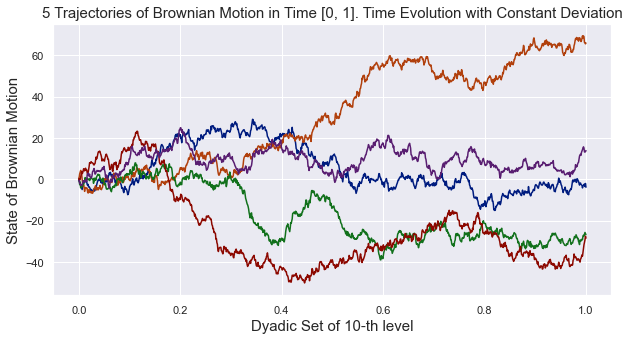

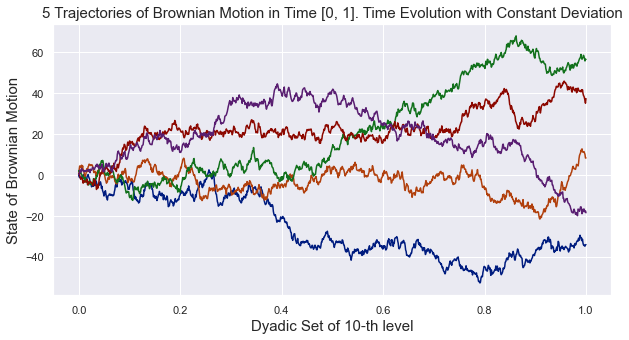

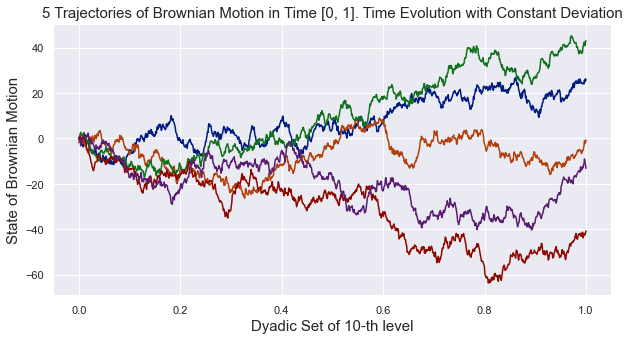

In [31]:
N, x, n = 5, 0, 10 
PlotBrownianTrajectories_ConstantVariation(N, x, n)
PlotBrownianTrajectories_ConstantVariation(N, x, n)
PlotBrownianTrajectories_ConstantVariation(N, x, n)

In [32]:
def BrownianTrajectories_QuadraticVariation(N, x, n):
    """
    - Input: N es la cantidad de trayectorias unidimensionales.
             x es la posicion inicial.
             n determina el orden diadico.
    ----------------------------------------------------------------
    - Output: Simula N trayectorias unidimensionales del movimiento
    Browniano partiendo en x hasta el tiempo 1, usando los 
    diadicos de nivel n.
    ----------------------------------------------------------------
    - Comentario: 
    """
    Dyadic_Set = LevelDyadics(n)
    Brownian_Motion = []
    Previous = [x]*N
    for k in range(len(Dyadic_Set)):
        Brownian_Motion.append(np.random.normal(x, k**2, N) + Previous)
        Previous = Brownian_Motion[-1]
    return Brownian_Motion
def PlotBrownianTrajectories_QuadraticVariation(N, x, n, style=0):
    """
    - Input: N es la cantidad de trayectorias unidimensionales.
             x es la posicion inicial.
             n determina el orden diadico.
             style determina la herramienta grafica, 0 para usar
             matplotlib, 1 para usar seaborn. Por default es 0.
    ----------------------------------------------------------------
    - Output: Entrega la imagen de N trayectorias unidimensionales 
    del movimiento Browniano partiendo en x hasta el tiempo 1, 
    usando los diadicos de nivel n.
    ----------------------------------------------------------------
    - Comentario: 
    """
    Domain = LevelDyadics(n)
    plt.figure(figsize = (10,5))
    plt.grid(True)
    plt.title(f''+str(N)+' Trajectories of Brownian Motion in Time '+str([0,1])+'. Time Evolution with Quadratic Deviation', fontsize=15)
    plt.xlabel(f'Dyadic Set of '+str(n)+'-th level', fontsize=15)
    plt.ylabel('State of Brownian Motion', fontsize=15)
    if style == 0:
        Brownian_Trajectories = BrownianTrajectories_QuadraticVariation(N, x, n)
        for j in range(N):
            Trajectory = []
            for i in range(2**n+1):
                Trajectory.append(Brownian_Trajectories[i][j])
            plt.plot(Domain, Trajectory)
    if style == 1:
        Brownian_Trajectories = pd.DataFrame(np.array(BrownianTrajectories_QuadraticVariation(N, x, n)))
        sb.lineplot(data=Brownian_Trajectories, legend=False)

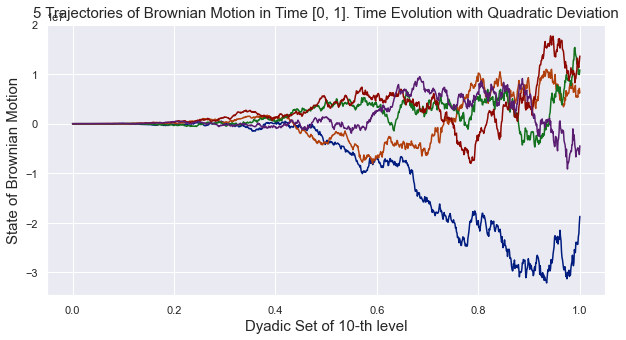

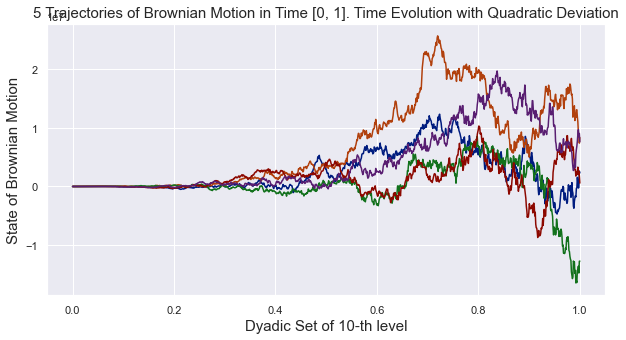

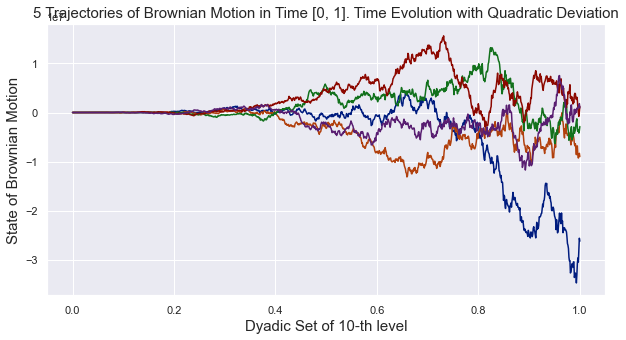

In [33]:
N, x, n = 5, 0, 10 
PlotBrownianTrajectories_QuadraticVariation(N, x, n)
PlotBrownianTrajectories_QuadraticVariation(N, x, n)
PlotBrownianTrajectories_QuadraticVariation(N, x, n)

In [34]:
def BrownianTrajectories_ExponentialVariation(N, x, n):
    """
    - Input: N es la cantidad de trayectorias unidimensionales.
             x es la posicion inicial.
             n determina el orden diadico.
    ----------------------------------------------------------------
    - Output: Simula N trayectorias unidimensionales del movimiento
    Browniano partiendo en x hasta el tiempo 1, usando los 
    diadicos de nivel n.
    ----------------------------------------------------------------
    - Comentario: 
    """
    Dyadic_Set = LevelDyadics(n)
    Brownian_Motion = []
    Previous = [x]*N
    for k in range(len(Dyadic_Set)):
        Brownian_Motion.append(np.random.normal(x, 2**k, N) + Previous)
        Previous = Brownian_Motion[-1]
    return Brownian_Motion
def PlotBrownianTrajectories_ExponentialVariation(N, x, n, style=0):
    """
    - Input: N es la cantidad de trayectorias unidimensionales.
             x es la posicion inicial.
             n determina el orden diadico.
             style determina la herramienta grafica, 0 para usar
             matplotlib, 1 para usar seaborn. Por default es 0.
    ----------------------------------------------------------------
    - Output: Entrega la imagen de N trayectorias unidimensionales 
    del movimiento Browniano partiendo en x hasta el tiempo 1, 
    usando los diadicos de nivel n.
    ----------------------------------------------------------------
    - Comentario: 
    """
    Domain = LevelDyadics(n)
    plt.figure(figsize = (10,5))
    plt.grid(True)
    plt.title(f''+str(N)+' Trajectories of Brownian Motion in Time '+str([0,1])+'. Time Evolution with Exponential Deviation', fontsize=15)
    plt.xlabel(f'Dyadic Set of '+str(n)+'-th level', fontsize=15)
    plt.ylabel('State of Brownian Motion', fontsize=15)
    if style == 0:
        Brownian_Trajectories = BrownianTrajectories_ExponentialVariation(N, x, n)
        for j in range(N):
            Trajectory = []
            for i in range(2**n+1):
                Trajectory.append(Brownian_Trajectories[i][j])
            plt.plot(Domain, Trajectory)
    if style == 1:
        Brownian_Trajectories = pd.DataFrame(np.array(BrownianTrajectories_ExponentialVariation(N, x, n)))
        sb.lineplot(data=Brownian_Trajectories, legend=False)

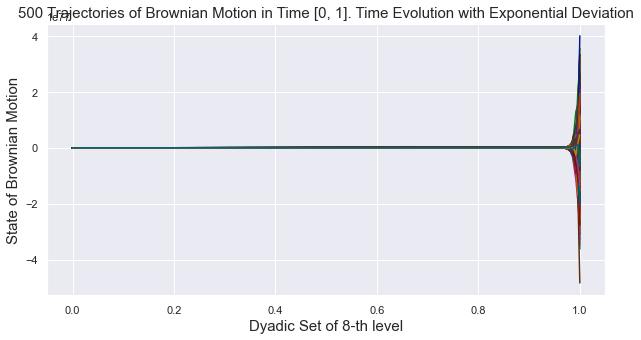

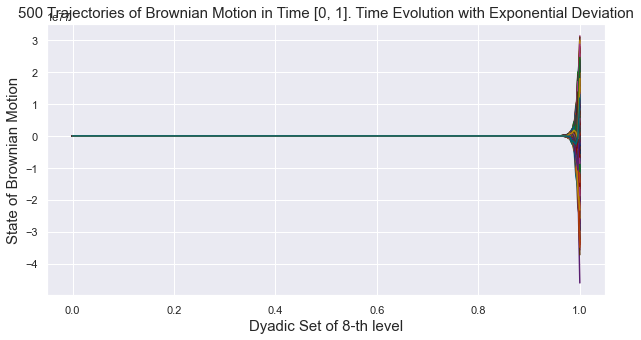

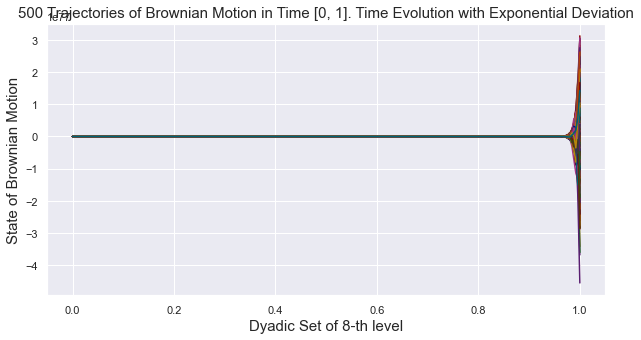

In [35]:
N, x, n = 500, 0, 8
PlotBrownianTrajectories_ExponentialVariation(N, x, n)
PlotBrownianTrajectories_ExponentialVariation(N, x, n)
PlotBrownianTrajectories_ExponentialVariation(N, x, n)